In [3]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [4]:
df_US = df[df['job_country'] == 'United States'].copy() #Creating a copy from existing dataframe and it prevents altering original dataset

In [5]:
top_three = df_US['job_title_short'].value_counts().head(3)
top_three = top_three.index.to_list()

In [6]:
df_US.applymap(type).iloc[0] 

C:\Users\rasak\AppData\Local\Temp\ipykernel_11664\3468415011.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_US.applymap(type).iloc[0]


job_title_short               <class 'str'>
job_title                     <class 'str'>
job_location                  <class 'str'>
job_via                       <class 'str'>
job_schedule_type             <class 'str'>
job_work_from_home           <class 'bool'>
search_location               <class 'str'>
job_posted_date               <class 'str'>
job_no_degree_mention        <class 'bool'>
job_health_insurance         <class 'bool'>
job_country                   <class 'str'>
salary_rate              <class 'NoneType'>
salary_year_avg             <class 'float'>
salary_hour_avg             <class 'float'>
company_name                  <class 'str'>
job_skills               <class 'NoneType'>
job_type_skills          <class 'NoneType'>
Name: 0, dtype: object

In [7]:
df_US['job_posted_date'] = pd.to_datetime(df_US['job_posted_date'])
df_US.applymap(type).iloc[0] 

C:\Users\rasak\AppData\Local\Temp\ipykernel_11664\1870233263.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_US.applymap(type).iloc[0]


job_title_short                                              <class 'str'>
job_title                                                    <class 'str'>
job_location                                                 <class 'str'>
job_via                                                      <class 'str'>
job_schedule_type                                            <class 'str'>
job_work_from_home                                          <class 'bool'>
search_location                                              <class 'str'>
job_posted_date          <class 'pandas._libs.tslibs.timestamps.Timesta...
job_no_degree_mention                                       <class 'bool'>
job_health_insurance                                        <class 'bool'>
job_country                                                  <class 'str'>
salary_rate                                             <class 'NoneType'>
salary_year_avg                                            <class 'float'>
salary_hour_avg          

In [8]:
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')


In [9]:
df_US_pivot = df_US.pivot_table(index='job_posted_month' , columns='job_title_short', aggfunc='size')
#df_US_pivot.reset_index() this is to get new index values
# Define a mapping from month names to month numbers
month_mapping = {'January': 1, 'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,'July': 7,'August': 8,'September': 9,'October': 10,'November': 11,'December': 12}
df_US_pivot['month_no'] = df_US_pivot.index.map(month_mapping)
df_US_pivot.sort_values('month_no', inplace=True)

Text(0.5, 1.0, 'Top Three Most Posted Jobs in the US by Months')

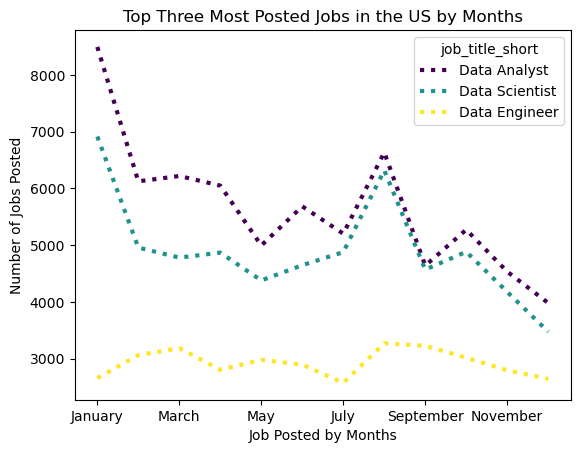

In [10]:
df_US_pivot[top_three].plot(kind='line', linewidth=3, linestyle=':', colormap='viridis') #---,::,--
plt.xlabel('Job Posted by Months')
plt.ylabel('Number of Jobs Posted')
plt.title('Top Three Most Posted Jobs in the US by Months')

In [11]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

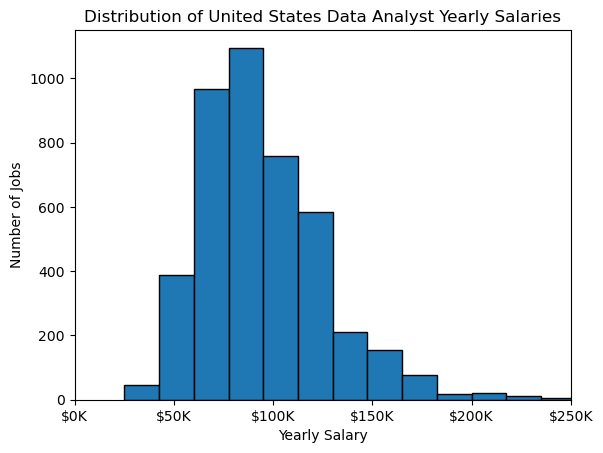

In [19]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlim(0, 250000)
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
ax = plt.gca() 
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.show()

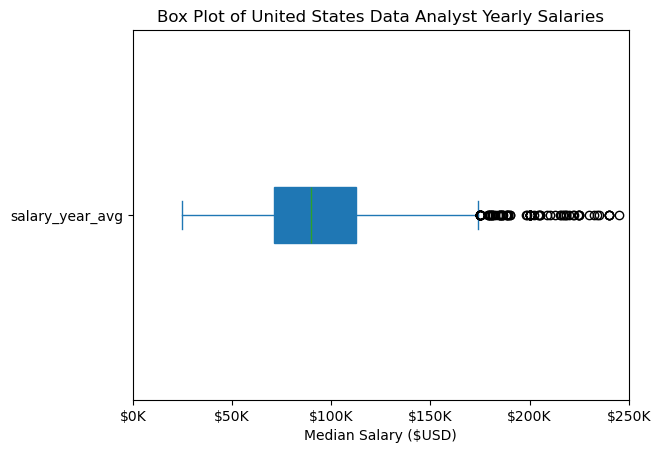

In [29]:
#Boxplot is great for comparing values in a distribution
df_DA_US['salary_year_avg'].plot(kind='box', vert=False, patch_artist=True)
plt.title('Box Plot of United States Data Analyst Yearly Salaries')
plt.xlim(0, 250000)
plt.xlabel('Median Salary ($USD)')
ax = plt.gca() 
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

C:\Users\rasak\AppData\Local\Temp\ipykernel_11664\2333396264.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


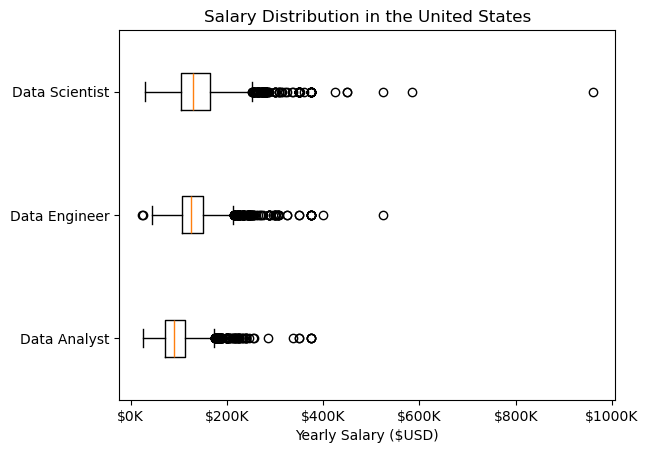

In [37]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])
job_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca() 
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))
plt.show()

In [38]:
import seaborn as sns

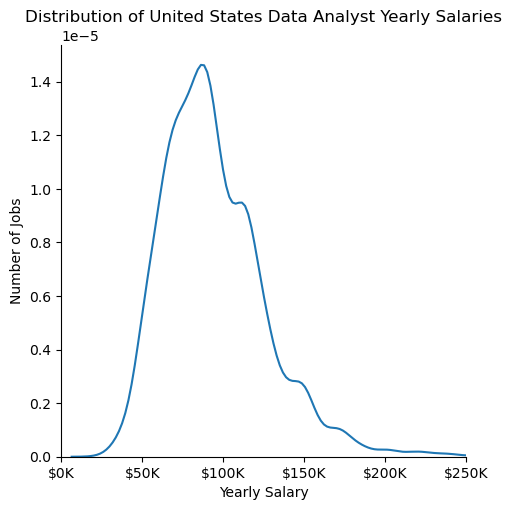

In [42]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde')
plt.xlim(0, 250000)
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
ax = plt.gca() 
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()

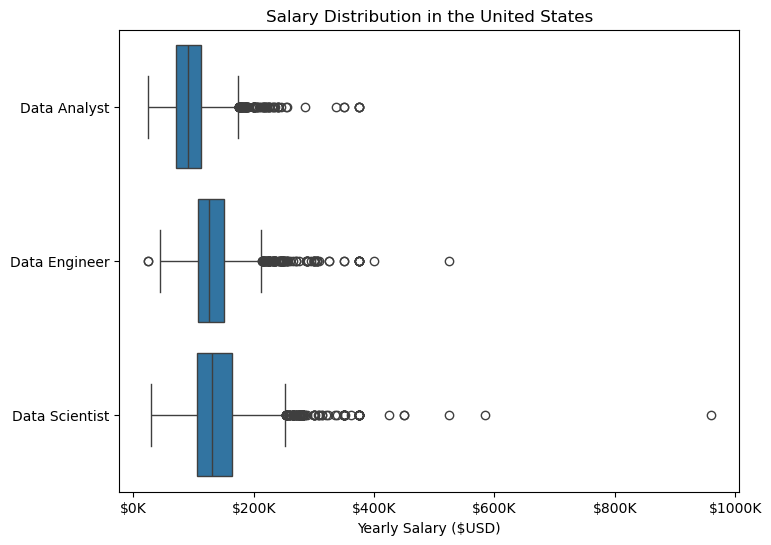

In [53]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])
job_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short', order=job_titles)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca() 
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))
plt.show()